#### Import Libraries

In [237]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Preparation

##### Load Dataset

In [238]:
data = pd.read_csv(r"C:\Users\User\Desktop\Anomaly Detection in Financial Transactions\transaction_anomalies_dataset.csv")
data.shape

(1000, 12)

##### First 5 rows

In [239]:
data.head(5)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,6:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,1:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,8:00,56,Female,649457,Savings


##### Get each feature info

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


##### Total number of unique values in each column

In [241]:
data.nunique()

Transaction_ID                 1000
Transaction_Amount             1000
Transaction_Volume                4
Average_Transaction_Amount     1000
Frequency_of_Transactions        15
Time_Since_Last_Transaction      29
Day_of_Week                       7
Time_of_Day                      24
Age                              47
Gender                            2
Income                          999
Account_Type                      2
dtype: int64

##### Check for NULL values in each column if there is any

In [242]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

#### Data Visualization-------------------------------------------------------------------------------------------------------------------------------------------

In [243]:
##### Describe each numnerical feature stats
data.describe()  

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501903,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


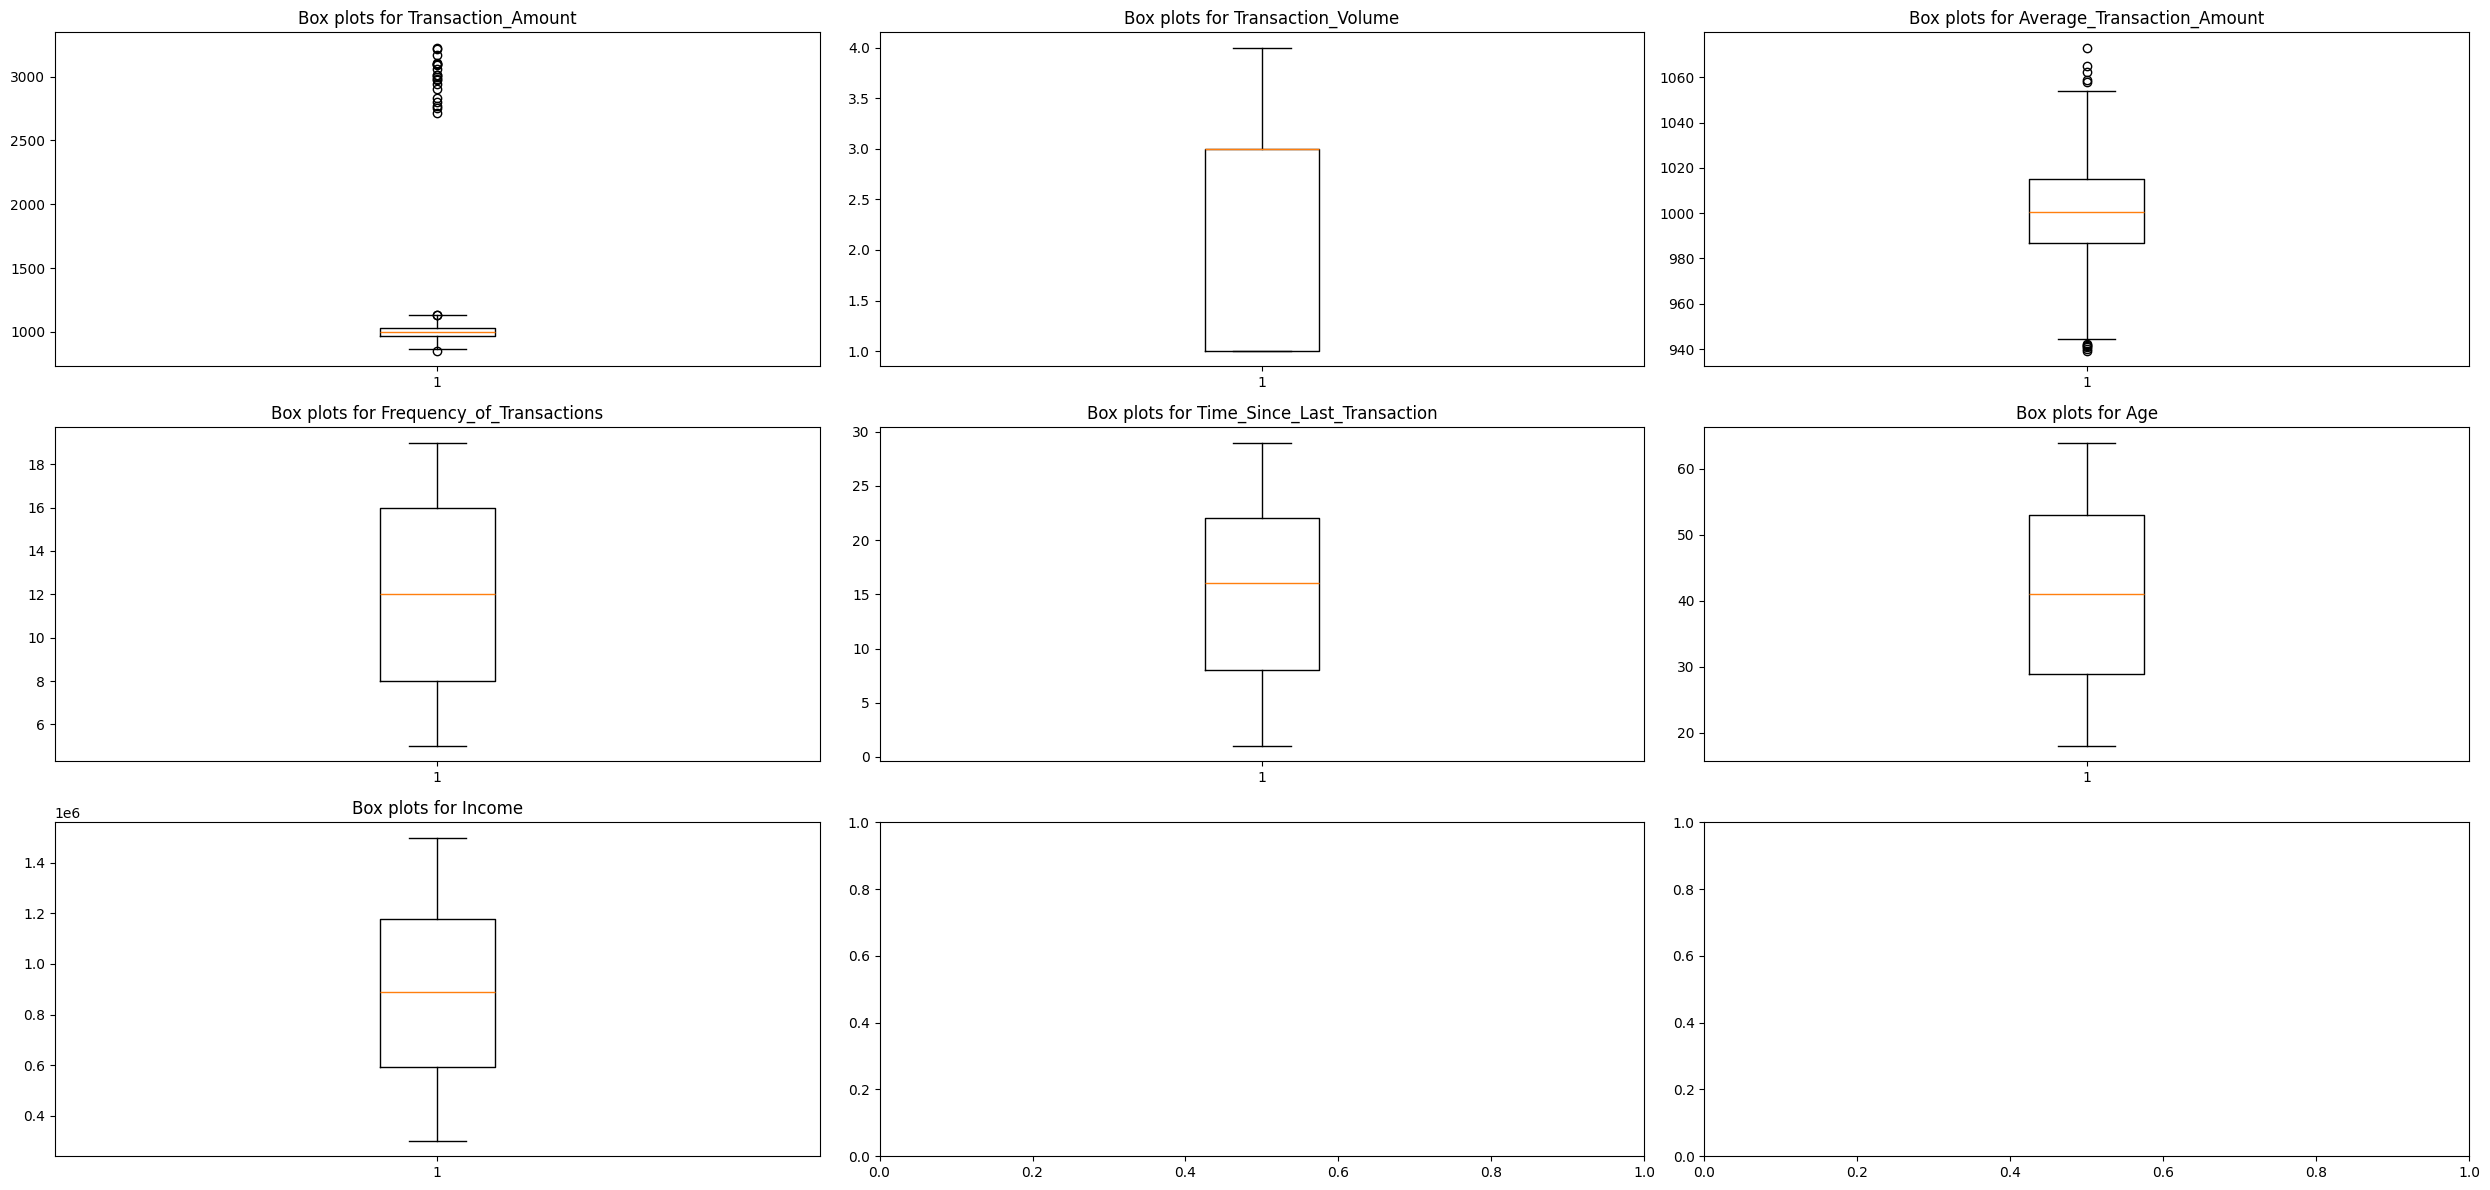

In [244]:
# NOTE: "Transaction_ID" is irrelevant for any type of data analysis

# Box plots to check Range and IQR of every numerical continuous columns
'''"Transaction_Amount", "Transaction_Volume", "Average_Transaction_Amount", "Frequency_of_Transactions", "Time_Since_Last_Transaction", "Income" \
    are the columns that support Box Plot.'''

columns_boxplots = ["Transaction_Amount", "Transaction_Volume", "Average_Transaction_Amount", "Frequency_of_Transactions", "Time_Since_Last_Transaction", "Age", "Income"]
fig, axes= plt.subplots(int(np.ceil(len(columns_boxplots)/3)), 3, figsize=(25,12))
axes = axes.flatten()
for i, column_boxplot in enumerate(columns_boxplots):
    axes[i].boxplot(data[column_boxplot])
    axes[i].set_title(f"Box plots for {column_boxplot}")
plt.tight_layout()
plt.show()

#### (A) Using Statistics

##### (i) Finding outliers (Anomalies) using Z-Score

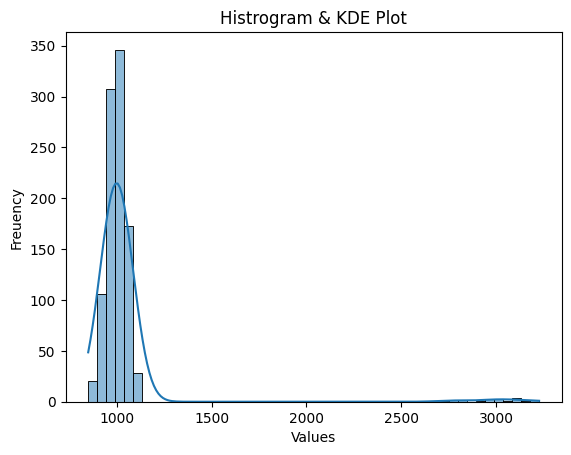

In [245]:
# Kernel Density Estimation Graph using Seaborn
sns.histplot(data["Transaction_Amount"], bins=50, kde=True)
plt.title("Histrogram & KDE Plot")
plt.xlabel("Values")
plt.ylabel("Freuency")
plt.show()

"Transaction_Amount" feature (Column) doesn't follow a normal distribution, and it is right skewed. By 'Chebyshev's inequality, we can say that at least 75% of the data necessarily will fall into 2 standard deviations.

NOTE:  By Chebyshev's inequality for non-normal distributions:

    > (mean - 2std dev)        <=   At least 75% data   <=   (mean + 2*std dev)

    > (mean - 2√2*std dev)     <=   At least 87.5%      <=   (mean + 2√2*std dev) 
    
    > (mean - 3*std dev)       <=   At least 88.88%     <=   (mean + 3*std dev) 

    > (mean - 4*std dev)       <=   At least 93.75%     <=   (mean + 4*std dev)
    
    > (mean - 5*std dev)       <=   At least 96%        <=   (mean + 5*std dev)

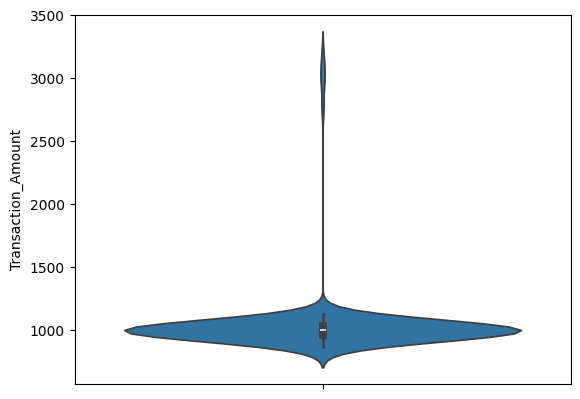

In [246]:
sns.violinplot(data["Transaction_Amount"])
plt.show()

In [247]:
'''On the basis of box plot of "Transaction_Amount" and non-normal distribution and by Chebyshev's inequality, We are going to check for 4 std dev'''
temp_data = pd.DataFrame()
temp_data["Transaction_Amount"] = data["Transaction_Amount"].copy()
temp_data["Income"] = data["Income"].copy()
mean = temp_data["Transaction_Amount"].mean()
std_dev = temp_data["Transaction_Amount"].std()

thresold_4_stddev = round(mean + (4*std_dev))     # 2172.44 thresold for 3 std dev
temp_data["4stddev_isanomaly"] = temp_data["Transaction_Amount"] > thresold_4_stddev

non_anomalies_4_stddev = list(temp_data[temp_data["4stddev_isanomaly"]==0]["Transaction_Amount"])
anomalies_4_stddev =list(temp_data[temp_data["4stddev_isanomaly"]==1]["Transaction_Amount"])


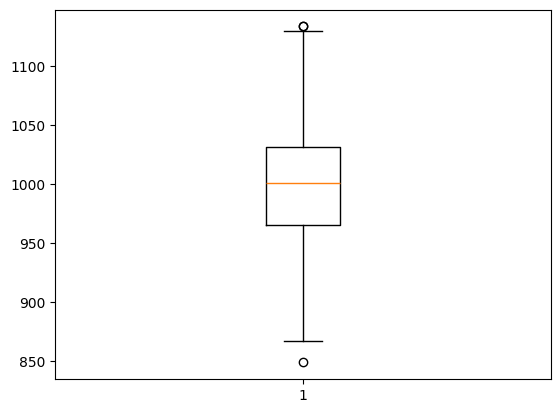

In [248]:
plt.boxplot(non_anomalies_4_stddev)
plt.show()

In [249]:
# Result using Z-Score
print("Total number of transactions : ", len(data["Transaction_Amount"]))
print("Total number of normal transactions : ", len(non_anomalies_4_stddev))
print("Thresold with 4 std dev :", thresold_4_stddev)
print("Total number of anomalies : ", len(anomalies_4_stddev))
print("\nDetected anomalies' transaction amount with 4 std dev :", anomalies_4_stddev)

Total number of transactions :  1000
Total number of normal transactions :  980
Thresold with 4 std dev : 2172
Total number of anomalies :  20

Detected anomalies' transaction amount with 4 std dev : [2769.890232, 2802.097817, 3094.817415, 2752.63765, 3008.497489, 3058.483023, 3218.959781, 2944.766209, 2996.004503, 3166.250653, 3227.459108, 2973.267078, 2713.596587, 2903.890238, 3009.401408, 3094.646173, 3108.424034, 2982.897583, 2833.966439, 3091.310338]


In [250]:
list(anomalies_4_stddev)

[2769.890232,
 2802.097817,
 3094.817415,
 2752.63765,
 3008.497489,
 3058.483023,
 3218.959781,
 2944.766209,
 2996.004503,
 3166.250653,
 3227.459108,
 2973.267078,
 2713.596587,
 2903.890238,
 3009.401408,
 3094.646173,
 3108.424034,
 2982.897583,
 2833.966439,
 3091.310338]

##### (ii) Using Inter Quartile Range (IQR)

In [251]:
temp_data.columns

Index(['Transaction_Amount', 'Income', '4stddev_isanomaly'], dtype='object')

In [252]:
'''Compute IQR and then check the apply the below condition
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR'''


Q1 = temp_data["Transaction_Amount"].quantile(0.25)
Q3 = temp_data["Transaction_Amount"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = float(Q1 - 1.5*IQR)
upper_bound = float(Q3 + 1.5*IQR)

temp_data["isAnomaly_IQR"] = temp_data["Transaction_Amount"].apply(lambda x: True if ((x<lower_bound) or  (x>upper_bound)) else False)
normal_transactions_IQR = list(temp_data[temp_data["isAnomaly_IQR"]==False]["Transaction_Amount"])
anomalies_transaction_IQR = list(temp_data[temp_data["isAnomaly_IQR"]==True]["Transaction_Amount"])

In [253]:
# Result using IQR
print("Total number of transactions : ", len(temp_data["Transaction_Amount"]))
print("Total number of normal transactions : ", len(normal_transactions_IQR))
print(f"Lower Bound : {lower_bound} and Upper Bound : {upper_bound}")
print("Total number of anomalies : ", len(anomalies_transaction_IQR))
print("\nDetected anomalies' transaction amount with 4 std dev :", anomalies_transaction_IQR)

Total number of transactions :  1000
Total number of normal transactions :  977
Lower Bound : 865.3565048749997 and Upper Bound : 1133.8159486750005
Total number of anomalies :  23

Detected anomalies' transaction amount with 4 std dev : [2769.890232, 2802.097817, 3094.817415, 2752.63765, 3008.497489, 3058.483023, 1133.905494, 849.0243922, 3218.959781, 2944.766209, 2996.004503, 3166.250653, 3227.459108, 2973.267078, 2713.596587, 1133.898864, 2903.890238, 3009.401408, 3094.646173, 3108.424034, 2982.897583, 2833.966439, 3091.310338]


#### (B) Using Machine Learning algorithms

##### (i) Find Anomalies using 'Isolation Forest'

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [255]:
from sklearn.ensemble import IsolationForest

In [264]:
data_isolation_forest = data[["Transaction_Amount", "Average_Transaction_Amount", "Frequency_of_Transactions", "Age", "Income"]].copy()
data_isolation_forest.head()

,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Age,Income
0,1024.835708,997.234714,12,36,1436074
1,1013.952065,1020.210306,7,41,627069
2,970.956093,989.496604,5,61,786232
3,1040.822254,969.522480,16,61,619030
4,998.777241,1007.111026,7,56,649457


In [265]:
'''Using contamination 0.03 because z-score gave 20 (0.02%) out of 1000 transactions as anomalies and besides those there might be some hidden relation between numerical 
   columns which are anomalies.'''
model = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.03, random_state=42)
data_isolation_forest["Anomaly_Score"] = model.fit_predict(data_isolation_forest)

In [266]:
data_isolation_forest["Anomaly"] = data_isolation_forest["Anomaly_Score"].apply(lambda x: 1 if x == -1 else 0)
print("Total number of anomalies :", data_isolation_forest["Anomaly"].sum())
data_isolation_forest[data_isolation_forest["Anomaly_Score"]==-1]

Total number of anomalies : 30


,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Age,Income,Anomaly_Score,Anomaly
20,934.502466,1058.873268,7,32,361087,-1,1
59,2769.890232,1007.261392,17,58,1198320,-1,1
71,1072.557180,1019.185417,5,20,1498735,-1,1
147,2802.097817,995.475096,12,34,694966,-1,1
155,1129.885232,986.992581,19,37,1492324,-1,1
188,3094.817415,980.424667,6,57,1158058,-1,1
230,2752.637650,1020.914703,11,57,1460932,-1,1
238,1007.771367,1049.314679,6,50,1473057,-1,1
246,3008.497489,1010.593855,16,37,551537,-1,1
252,902.800629,1053.994283,9,19,363037,-1,1


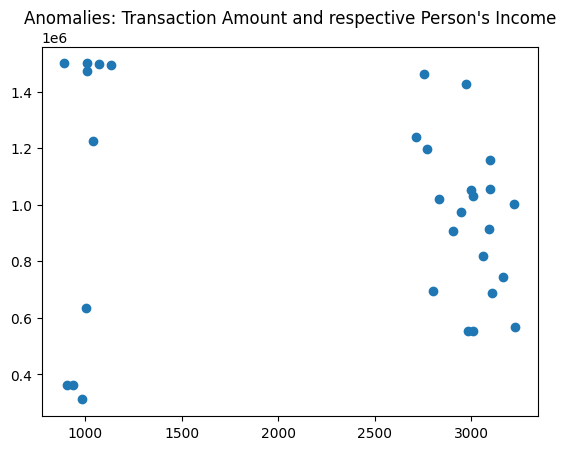

In [262]:
plt.scatter(data_isolation_forest[data_isolation_forest["Anomaly_Score"]==-1]["Transaction_Amount"], data_isolation_forest[data_isolation_forest["Anomaly_Score"]==-1]["Income"])
plt.title("Anomalies: Transaction Amount and respective Person's Income")
plt.show()

#### (ii) Local Outlier Factor

In [329]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [ ]:
data_lof = data[["Transaction_Amount", "Average_Transaction_Amount", "Frequency_of_Transactions", "Age", "Income"]].copy()
data_lof.head()

   Transaction_Amount  Average_Transaction_Amount  Frequency_of_Transactions  \
0         1024.835708                  997.234714                         12   
1         1013.952065                 1020.210306                          7   
2          970.956093                  989.496604                          5   
3         1040.822254                  969.522480                         16   
4          998.777241                 1007.111026                          7   

   Age   Income  
0   36  1436074  
1   41   627069  
2   61   786232  
3   61   619030  
4   56   649457  


In [334]:
'''Standardize the data'''
scaler = StandardScaler()
data_lof = pd.DataFrame(scaler.fit_transform(data_lof), columns=["Transaction_Amount", "Average_Transaction_Amount", "Frequency_of_Transactions", "Age", "Income"])
data_lof.head()

,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Age,Income
0,-0.046877,-0.167190,-0.018383,-0.335987,1.568007
1,-0.085276,0.946939,-1.196766,0.025990,-0.775688
2,-0.236970,-0.542425,-1.668119,1.473897,-0.314592
3,0.009525,-1.511008,0.924324,1.473897,-0.798977
4,-0.138814,0.311731,-1.196766,1.111920,-0.710830


In [371]:
'''Keeping n_neighbors = 3 to find Local and Global both Anomalies'''
lof = LocalOutlierFactor(n_neighbors=2, contamination="auto")
data_lof["Anomaly_Score"] = lof.fit_predict(data_lof)

In [372]:
data_lof["Anomaly"] = data_lof["Anomaly_Score"].apply(lambda x: 1 if x == -1 else 0)
print("Total number of anomalies :", data_lof["Anomaly"].sum())
data_lof[data_lof["Anomaly_Score"]==-1]

Total number of anomalies : 28


,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions,Age,Income,Anomaly_Score,Anomaly
46,-0.158442,-0.802667,-0.725413,1.691083,1.299046,-1,1
53,-0.243013,2.014539,0.688647,-1.639103,1.425492,-1,1
110,-0.131251,1.592776,-1.668119,-1.566708,-0.530810,-1,1
238,-0.107082,2.358265,-1.432443,0.677548,1.675147,-1,1
296,-0.063187,-0.890447,-1.432443,1.111920,-1.453009,-1,1
297,0.032113,-0.701536,0.924324,0.605153,-0.909580,-1,1
320,-0.034062,2.133985,1.631354,1.039525,-0.105184,-1,1
349,-0.597350,-1.216947,0.924324,1.691083,0.978185,-1,1
360,-0.522523,-1.693884,1.631354,1.546292,1.750742,-1,1
376,-0.285935,1.058541,0.217294,-1.059940,-1.327354,-1,1


In [374]:
# All methods performance
print("Total number of transactions :", len(data["Transaction_Amount"]))
print("Total number of Anomalies by Z-Score :", len(anomalies_4_stddev))
print("Total number of Anomalies by IQR :", len(anomalies_transaction_IQR))
print("Total number of Anomalies by Isolation Forest :", data_isolation_forest["Anomaly"].sum())
print("Total number of Anomalies by Local Outlier Factor:", data_lof["Anomaly"].sum())

Total number of transactions : 1000
Total number of Anomalies by Z-Score : 20
Total number of Anomalies by IQR : 23
Total number of Anomalies by Isolation Forest : 30
Total number of Anomalies by Local Outlier Factor: 28
